# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Bitcoin, Ethereum, Fantom, and Neo Daily Price Analyses – 21 June Roundup.  The global crypto market is again facing a downtrend due to increased losses. The changes have resulted in decreasing gains for Bitcoin, Ethereum, and other coins in the market. The impacts of recession have begun to surface as various coins have turned bearish. The ongoing situation tells of a coming bearishness for Bitcoin and other... ... [| Skaityti daugiau](https://www.cryptopolitan.com/bitcoin-ethereum-fantom-and-neo-daily-price-analyses-21-june-roundup/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Fertility tracker and AI used to identify Covid days before symptoms appeared.  In study conducted since start of pandemic, 68 per cent of Covid cases were successfully diagnosed two days before onset of symptoms ... [| Skaityti daugiau](http://www.independent.co.uk/news/health/fertility-tracker-used-to-identify-covid-infections-before-symptoms-appeared-b2105996.html) 

### Kainų kaita pandemijos metu

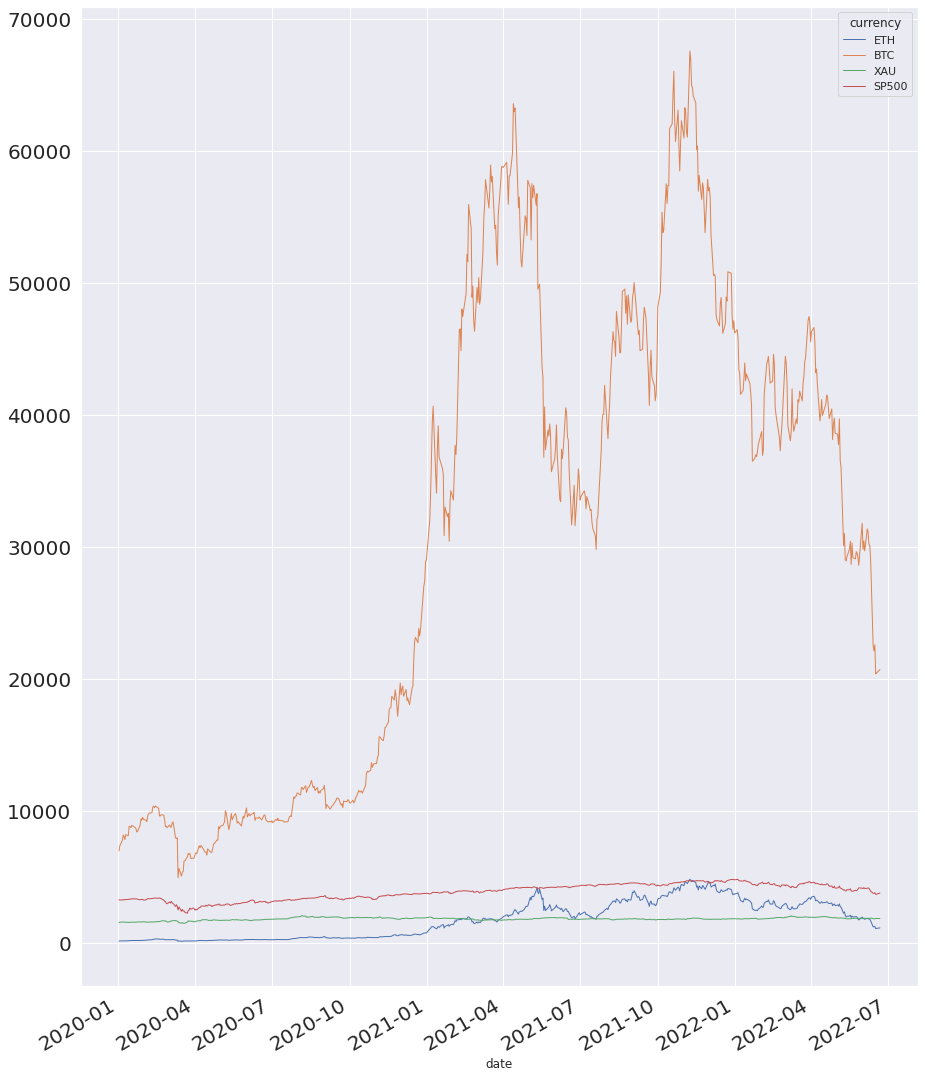

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.903023,0.246625,0.922908
BTC,0.903023,1.000000,0.194076,0.870410
XAU,0.246625,0.194076,1.000000,0.378241
SP500,0.922908,0.870410,0.378241,1.000000


In [8]:
#hide ### Koreliacijos matrica.

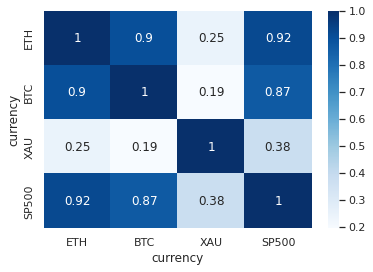

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')